# NGCC HRSG Subflowsheet

To reduce the complexity of the NGCC model it is brocken into three parts 1) gas turbine, 2) heat recovery steam generator, and 3) steam turbine.  This notebook demonstrates running and getting results for teh HRSG section.

The HRSG model is sized for an NGCC that produces approximatly 650 MWe net when carbon capture is included. 

# Import Needed Modules

In [1]:
from IPython.core.display import SVG
import pyomo.environ as pyo
import idaes
import idaes.core.util.scaling as iscale
from idaes.core.solvers import use_idaes_solver_configuration_defaults
from idaes.core.util.model_statistics import degrees_of_freedom
import hrsg

## Use the IDAES solver config 

Tell any solver that are created here on to use IDAES configuration and set the ipopt scaling method to 'user scaling' to pick up the variable scale factors.  

In [2]:
use_idaes_solver_configuration_defaults()
idaes.cfg.ipopt.options.nlp_scaling_method = "user-scaling"

## Create an initialize the model

This gets the flowsheet set up with input that should be consitent with the 650 MWe NGCC with carbon capture.  This also runs the initialization routine to populate variables with values that should make the model solvable.

In [3]:
# Create and initialize the HRSG flowsheet, is hrsg_init.json.gz exists
# load previous initialization to save time.
m = pyo.ConcreteModel()
m.fs = hrsg.HrsgFlowsheet(name="HRSG", default={"dynamic": False})
iscale.calculate_scaling_factors(m)
m.fs.initialize()
assert degrees_of_freedom(m) == 0

## Solve the Model

In [4]:
solver = pyo.SolverFactory("ipopt")
res = solver.solve(m, tee=True, symbolic_solver_labels=True)
assert pyo.check_optimal_termination(res)

Ipopt 3.13.2: nlp_scaling_method=user-scaling
tol=1e-06


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

## See PFD with Streams Labeled

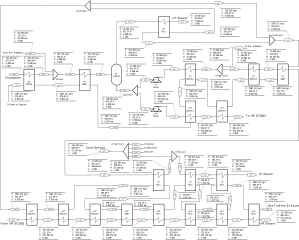

In [5]:
display(SVG(m.fs.write_pfd()))

## See Steam Stream Table

In [6]:
steam_stream_df = m.fs.steam_streams_dataframe()

In [7]:
display(steam_stream_df)

,mass flow (kg/s),molar enthalpy ((kJ)/mol),mole flow (kmol/s),pressure (bar),temperature (K),vapor fraction (None),volumetric flow (m**3/s)
hp01,125.445068,12.661683,6.963259,243.59,436.22599,0.0,0.136636
hp02,125.445068,14.519465,6.963259,233.8,460.334288,0.0,0.140343
hp03,125.445068,16.173425,6.963259,224.42,481.401952,0.0,0.144116
hp04,125.445068,19.409513,6.963259,215.46,521.115655,0.0,0.152907
hp05,125.445068,21.282834,6.963259,206.84,542.996811,0.0,0.159258
hp06,125.445068,22.852097,6.963259,198.57,560.471167,0.0,0.165534
hp07,125.445068,43.639128,6.963259,198.57,638.334344,1.0,0.75212
hp08,125.445068,51.480997,6.963259,193.12,675.848606,1.0,1.351268
hp09,125.445068,57.880086,6.963259,185.19,757.781948,1.0,1.960503
hp10,125.445068,60.881407,6.963259,179.67,809.560581,1.0,2.288327


## See Flue Gas Stream Table

In [8]:
flue_gas_stream_df = m.fs.flue_gas_streams_dataframe()

In [9]:
display(flue_gas_stream_df)

,mass flow (kg/s),mole flow (kmol/s),mole percent CO2 (%),mole percent H2O (%),mole percent N2 (%),mole percent O2 (%),pressure (bar),temperature (K),volumetric flow (m**3/s)
g08,1087.111061,38.44611,4.08,8.75,75.0,12.17,1.03421,878.15,2714.229474
g09,1087.111061,38.44611,4.08,8.75,75.0,12.17,1.030369,864.042609,2680.581636
g10,1087.111061,38.44611,4.08,8.75,75.0,12.17,1.026581,831.897413,2590.377001
g11,1087.111061,38.44611,4.08,8.75,75.0,12.17,1.022935,815.599458,2548.680315
g12,1087.111061,38.44611,4.08,8.75,75.0,12.17,1.019355,780.646789,2448.024289
g13,1087.111061,38.44611,4.08,8.75,75.0,12.17,1.000705,755.841024,2414.410739
g14,1087.111061,38.44611,4.08,8.75,75.0,12.17,0.997339,712.352572,2283.172927
g15,1087.111061,38.44611,4.08,8.75,75.0,12.17,0.997339,594.739839,1906.210425
g16,1087.111061,38.44611,4.08,8.75,75.0,12.17,0.997319,585.716578,1877.327245
g17,1087.111061,38.44611,4.08,8.75,75.0,12.17,0.927673,583.797634,2011.657774
